# Air pollution + weather 
## Dati-meteo Lugano
## lugano_air_pollution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
air_path = "ufam/lugano_air_pollution.csv"
weather_path = "meteo_suisse/Dati-meteo_Lugano.csv"

In [2]:
df_air = pd.read_csv(air_path, sep=';')
df_weather = pd.read_csv(weather_path, sep=',')

##### Show header

In [3]:
df_air.head()

,data,NOx - Ossidi di azoto - Ppb,NO - Monossido di azoto - µg/m³,NO2 - Diossido di azoto - µg/m³,O3 - Ozono - µg/m³,PM10 - Polveri fini - µg/m³
0,13.10.2018 23:15:00,15.0,1.0,27.0,20.0,33.0
1,13.10.2018 23:45:00,13.0,1.0,23.0,22.0,34.0
2,14.10.2018 00:15:00,12.0,1.0,23.0,22.0,31.0
3,14.10.2018 00:45:00,10.0,0.0,19.0,24.0,30.0
4,14.10.2018 01:15:00,9.0,0.0,16.0,25.0,30.0


In [4]:
df_weather.head()

,Data e ora,Temp. [°C],Prec. [mm],Data,Ora
0,01.10.2018 00:00,14.8,0.0,01.10.2018,00:00
1,01.10.2018 00:10,14.6,0.0,01.10.2018,00:10
2,01.10.2018 00:20,15.6,0.0,01.10.2018,00:20
3,01.10.2018 00:30,16.3,0.0,01.10.2018,00:30
4,01.10.2018 00:40,16.2,0.0,01.10.2018,00:40


## Air

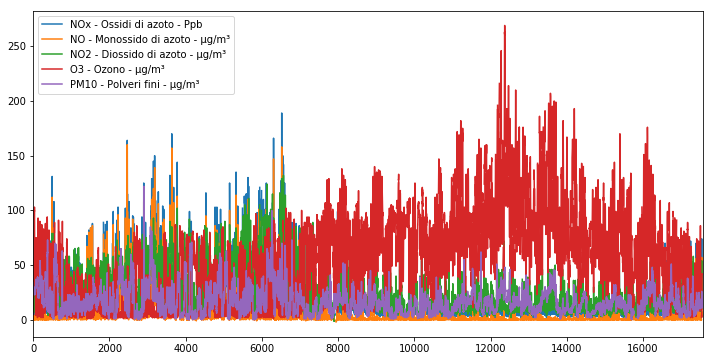

In [5]:
df_air.plot(figsize=(12,6))

In [6]:
df_air['data'] = pd.to_datetime(df_air['data'])

In [7]:
df_air['day'] = df_air['data'].dt.date

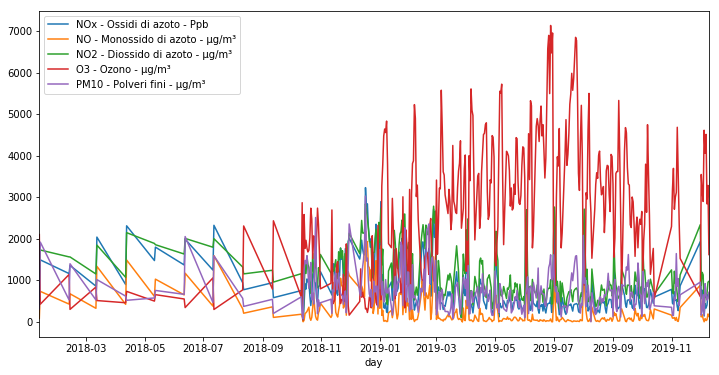

In [8]:
df_air.groupby('day').sum().plot(figsize=(12,6))

### NOx

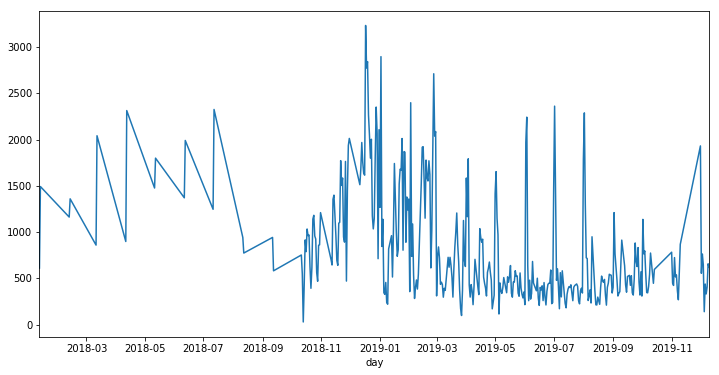

In [9]:
df_air.groupby('day').sum()['NOx - Ossidi di azoto - Ppb'].plot(figsize=(12,6))

### O3

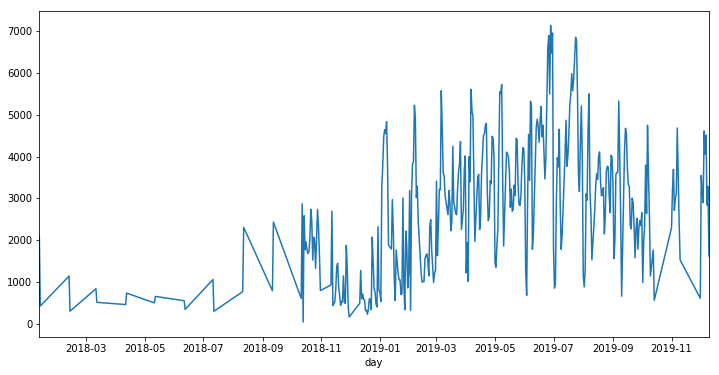

In [10]:
df_air.groupby('day').sum()['O3 - Ozono - µg/m³'].plot(figsize=(12,6))

### Fine Dust

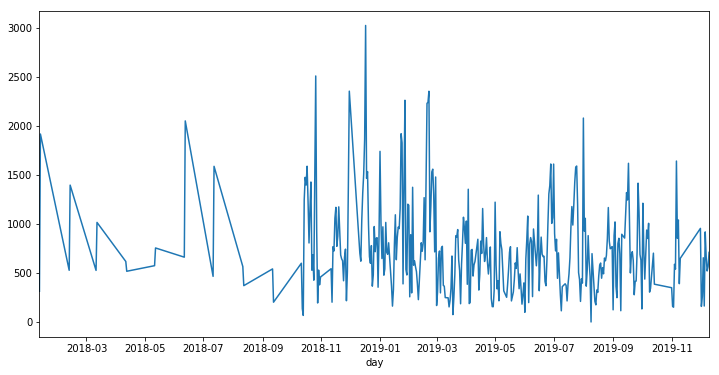

In [11]:
df_air.groupby('day').sum()['PM10 - Polveri fini - µg/m³'].plot(figsize=(12,6))

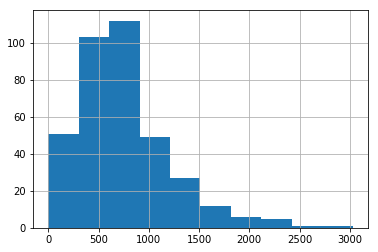

In [12]:
df_air.groupby('day').sum()['PM10 - Polveri fini - µg/m³'].hist()

## Weather

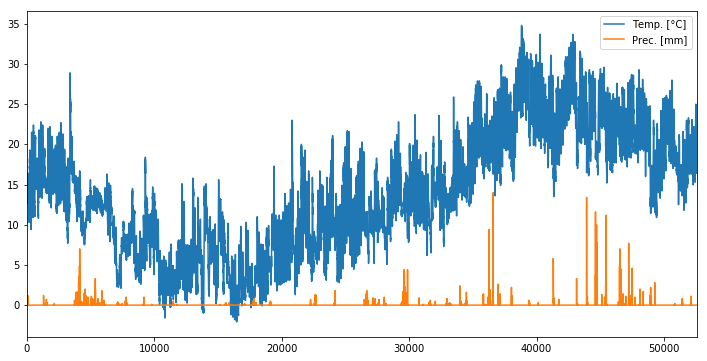

In [13]:
df_weather.plot(figsize=(12,6))

In [14]:
df_weather['Data e ora'] = pd.to_datetime(df_weather['Data e ora'])
df_weather['day'] = df_weather['Data e ora'].dt.date

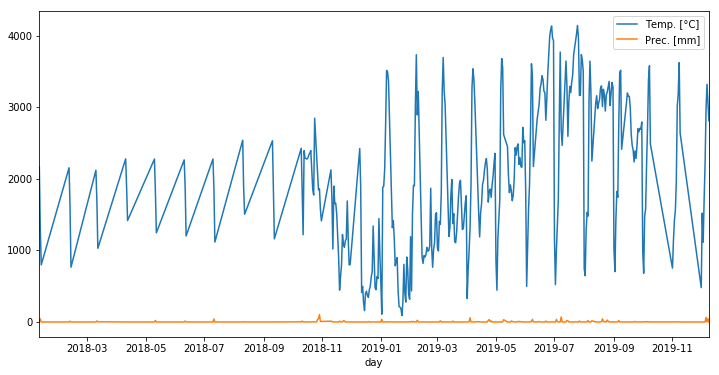

In [15]:
df_weather.groupby('day').sum().plot(figsize=(12,6))

### From the 2 df, we make only 1

In [16]:
df1 = df_weather.set_index('Data e ora').resample('H').agg({
    'Temp. [°C]':'mean',
    'Prec. [mm]':'mean',
    'Data':'last',
    'Ora':'last',
    'day':'last',
})

In [17]:
df2 = df_air.set_index('data').resample('H').mean()
df2.columns = ['NOx', 'NO', 'NO2', 'O3', 'PM10']

In [18]:
df1[df2.columns] = df2
df1 = df1.dropna()
# df1

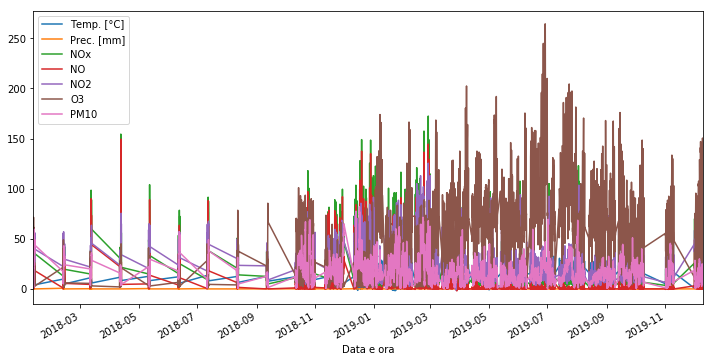

In [19]:
df1.plot(figsize=(12,6))

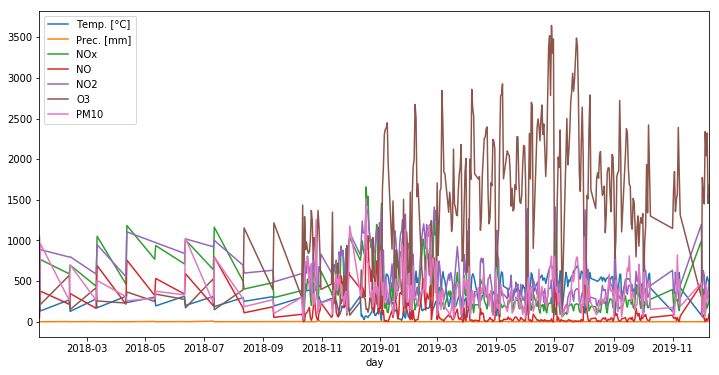

In [20]:
df1.groupby('day').sum().plot(figsize=(12,6))

In [21]:
df1.groupby('day').sum().corr()

,Temp. [°C],Prec. [mm],NOx,NO,NO2,O3,PM10
Temp. [°C],1.000000,0.032359,-0.683261,-0.600085,-0.706169,0.806862,-0.124258
Prec. [mm],0.032359,1.000000,-0.043657,-0.056695,-0.027678,-0.028768,-0.121274
NOx,-0.683261,-0.043657,1.000000,0.954939,0.958328,-0.742302,0.489739
NO,-0.600085,-0.056695,0.954939,1.000000,0.830391,-0.693263,0.408551
NO2,-0.706169,-0.027678,0.958328,0.830391,1.000000,-0.727106,0.525534
O3,0.806862,-0.028768,-0.742302,-0.693263,-0.727106,1.000000,-0.213902
PM10,-0.124258,-0.121274,0.489739,0.408551,0.525534,-0.213902,1.000000


In [22]:
import statsmodels.formula.api as smf 
ds = df1.copy()#.groupby('day').sum()
ds.rename({'Temp. [°C]':'temp', 'Prec. [mm]':'prec'},axis=1,inplace=True)

"""reg = smf.ols(" prec ~ NOx + NO + NO2 + O3 + PM10 ", ds).fit()
print("R-squared: {0:1.2f}%, N: {1:1,.0f}".format(reg.rsquared*100, reg.nobs))
reg.summary().tables[1]"""

reg = smf.ols(" PM10 ~ temp + prec ", ds).fit()
print("R-squared: {0:1.2f}%, N: {1:1,.0f}".format(reg.rsquared*100, reg.nobs))
reg.summary().tables[1]

R-squared: 1.19%, N: 8,355


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.1096,0.266,68.134,0.000,17.589,18.631
temp,-0.1496,0.017,-8.947,0.000,-0.182,-0.117
prec,-3.2342,0.706,-4.581,0.000,-4.618,-1.850
